<a href="https://colab.research.google.com/github/PedroFerreiraBento/Bacharelado-Ciencia-de-Dados/blob/main/1%20-%20Analista%20em%20Ciencia%20de%20dados/Modulo%201/Trabalho_Pratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático - Módulo 1

## Introdução a ciência de dados

### 1 - Importando dependencias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2 - Coleta de dados

In [ ]:
fretes = pd.read_csv("/content/frete_dias_entrega.csv", sep=";")

### 3 - Analisando os dados coletados

In [ ]:
# Visualização geral dos dados
fretes.tail()

,Região,Valor do Frete,Dias para Entrega
495,Centro-Oeste,88.72,7.0
496,Centro-Oeste,66.35,11.0
497,Centro-Oeste,41.56,22.0
498,Centro-Oeste,73.28,9.0
499,Centro-Oeste,60.75,14.0


In [ ]:
# Gerando dados estatísticos
fretes.describe()

,Valor do Frete,Dias para Entrega
count,500.000000,500.000000
mean,90.735140,7.512000
std,22.870106,5.733725
min,-5.370000,1.000000
25%,77.107500,3.000000
50%,94.765000,7.000000
75%,107.187500,11.000000
max,128.950000,33.000000


In [ ]:
# Verificando a existência de valores nulos ou ausentes
fretes.isna().sum()

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

In [ ]:
# Verificando a formatação dos dados
fretes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             500 non-null    object 
 1   Valor do Frete     500 non-null    float64
 2   Dias para Entrega  500 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


In [ ]:
# Verificando as regiões disponiveis
fretes["Região"].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

### 4 - Análise de correlação dos dados
- Correlação positiva: Ambas as variáveis crescem ou decrescem juntas, ou seja, posuem relação direta.
- Correlação negativa: Ambas as variáveis crescem ou decrescem em sentidos opestos, ou seja, posuem relação indireta.

In [ ]:
# Filtra apenas fretes do sudeste
sudeste = fretes.loc[fretes["Região"] == "Sudeste"]

# Encontra as correlações
sudeste.corr()

<ipython-input-47-7fbf07b80158>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


<ipython-input-48-894bcff38d54>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

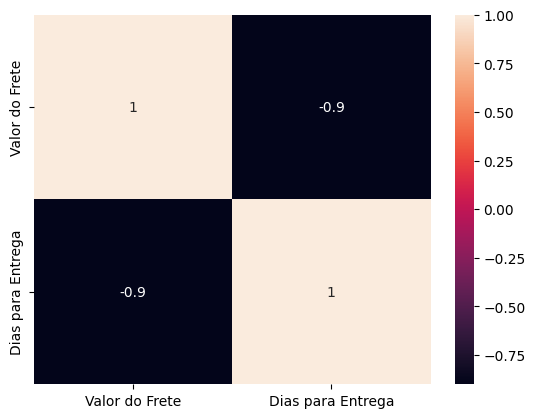

In [ ]:
# Análise gráfica da correlação
sns.heatmap(sudeste.corr(), annot=True)

### 5 - Tratamento dos dados
Preparação dos dados que serão utilizados no modelo de Regressão Linear. Deve ser realizada para que os dados estejam no formato que o algoritimo solicita como entrada.

**Criação da variável independente - X** 

In [ ]:
X = sudeste.loc[:, "Valor do Frete"].values
X = X.reshape(-1, 1)

**Criação da variável dependente - y**

In [ ]:
y = sudeste.loc[:, "Dias para Entrega"].values

### 6 - Criação do modelo de Machine Learning - Regressão Linear

In [ ]:
# Criação do modelo
dias_por_frete = LinearRegression()

In [ ]:
# Treinamento do modelo
dias_por_frete.fit(X, y)

LinearRegression()

In [ ]:
# Calculando a constante alfa - intercept
dias_por_frete.intercept_

27.94772254633564

In [ ]:
# Calculando a constante angular da reta - coef
dias_por_frete.coef_

array([-0.22741735])

### 7 - Visualização grafíca

In [ ]:
# Grafico 1
grafico = px.scatter(x=X.ravel(), y=y)
grafico.show()

In [ ]:
# Grafico 2
previsao_valores = dias_por_frete.predict(X)

grafico = px.scatter(x=X.ravel(), y=y)
grafico.add_scatter(x=X.ravel(), y=previsao_valores, name="previsão")
grafico.show()

In [ ]:
# Calculando prazo de entrega de acordo com a equação da regressão linear
alfa = dias_por_frete.intercept_
beta = dias_por_frete.coef_
xi = 52.98 # Frete utilizado para previsão
yi = (alfa + beta * xi)

print('Equação:', round(float(yi)))

# Calculando com o método predict
print("Método .predict:", dias_por_frete.predict([[xi]]))

Equação: 16
Método .predict: [15.89915149]


### 8 - Avaliando o modelo

In [ ]:
# Acertividade do modelo
dias_por_frete.score(X, y)

0.8111671052762233

In [ ]:
# Erro absoluto - Erro previsto pra cada frete
# (Erro médio pra cada frete) 
mean_absolute_error(y, previsao_valores)

2.091861170350245

In [ ]:
# Erro quadrado - Erro previsto pra cada frete elevado ao quadrado 
# (Pune erros maiores)
mean_squared_error(y, previsao_valores)

6.145679858522149

In [ ]:
# Raiz do erro quadrado - Raiz do quadrado do erro previsto pra cada frete  
# (Reduz outliers)
np.sqrt(mean_squared_error(y, previsao_valores))